In [82]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import glob

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# df['tag'] = df['tag'].map({'0': '0', 'S': '1', 'C': '2', 'G': '3', 'T': '4', 'B': '5','D': '6' })

In [1]:
path= '/Users/tancredicp/Desktop/sailing_app/data/ML Training Resources/'
all_files = glob.glob(path + "/*.csv")

listOfNormalizedDatFrames = []
listofTags = []


for filename in all_files:
    dfSpecific = pd.read_csv(filename, index_col=None, header=0)
    
    #I was lazy and did not check where the NaNs where but they were being annoying so made them all 0s.
    dfSpecific.fillna(0, inplace= True)
    
    dfSpecificY = dfSpecific[['tag']]
    dfSpecificY = dfSpecificY['tag'].astype('category')
#     dfSpecificY = dfSpecificY['tag'].map({'0': 0, 'S': 1, 'C': 2, 'G': 3, 'T': 4, 'B':5,'D': 6 })
    listofTags.append(dfSpecificY)
    
    dfSpecificX = dfSpecific.drop(columns=['tag', 'tag_name', 'boat_class', 'time'])
    
    #standardize data
    scaler = StandardScaler()
    columnsBeingStandardize = ['lat', 'lon', 'sog', 'heel', 'clew_load','pitch']
    dfSpecificX[columnsBeingStandardize] = scaler.fit_transform(dfSpecificX[columnsBeingStandardize])
    
    listOfNormalizedDatFrames.append(dfSpecificX)

X = pd.concat(listOfNormalizedDatFrames, axis=0, ignore_index=True)
y = pd.concat(listofTags, axis=0, ignore_index=True)

NameError: name 'glob' is not defined

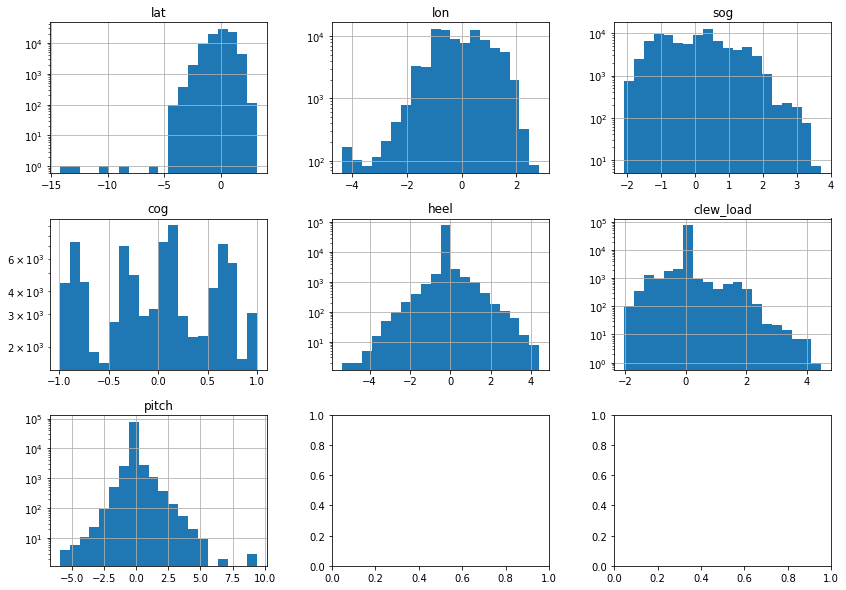

In [136]:
df = X
fig, axes = plt.subplots(len(df.columns)// 3 + 1, 3, figsize=(14, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        if i == 7:
            break
        df.hist(column = df.columns[i], bins = 20, ax=axis, log = True)
        i += 1

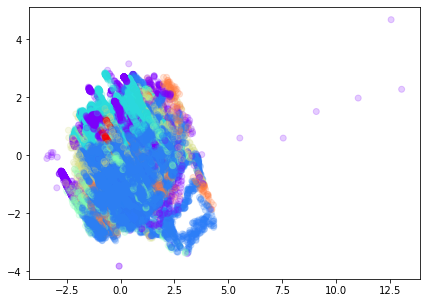

In [137]:
#having issues plotting a legend...
fig, ax = plt.subplots(figsize = (7,5))

c = np.array(y)
pca = PCA()
Xpca = X[['lat', 'lon', 'sog', 'cog']]
pca.fit(Xpca)
array = pca.transform(Xpca)
scatter = ax.scatter(array[:, 0], array[:, 1], c  = c,  cmap = 'rainbow', alpha = 0.2)
plt.show()
#this plot is straneg - unsure why we haev this line in the middle at 0.... i think it has something to do with 
# heel, pitch, clew load, - large number fo 0s in those areas plus if try without those fields you dont get it.

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3, test_size = 0.75, shuffle = False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21579, 8), (64739, 8), (21579,), (64739,))

In [156]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 100)
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
RFC.score(X_train, y_train), RFC.score(X_test, y_test)

(1.0, 0.546718361420473)